In [1]:
import os
import sys

os.chdir('../')

from model.model import EVSpaceModel
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
import numpy as np

import pandas as pd
def is_business_day(date):
        return bool(len(pd.bdate_range(date,date)))

In [2]:
cfg = 'configs/Mississauga_cfg.yml' #'configs/east_box.yml' #'configs/Mississauga_cfg.yml' # 'configs/Point_Edward_cfg.ym
prices = [0, 'base_run', 'none', 'shifted']
mdf_res = []
for price_mech in prices:
    model = EVSpaceModel(cfg=cfg, ModelP_price_set_mechanism = price_mech)  
    model.run_model(240) #24*365   
    # model.save()
    mdf = model.datacollector.get_model_vars_dataframe()
    mdf['price_mech'] = price_mech
    mdf['isbusinessday'] = [is_business_day(date) for date in mdf.date_time]
    mdf['hour'] = pd.to_datetime(mdf.date_time).dt.hour
    mdf_res.append(mdf)
mdf_all = pd.concat(mdf_res,ignore_index=True)

0
0 []
[]


c:\Users\gwharf\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


base_run
base_run hour
0     off
1     off
2     off
3     off
4     off
5     off
6     off
7      on
8      on
9      on
10     on
11    mid
12    mid
13    mid
14    mid
15    mid
16    mid
17     on
18     on
19    off
20    off
21    off
22    off
23    off
Name: base_run, dtype: object
hour
0     off
1     off
2     off
3     off
4     off
5     off
6     off
7      on
8      on
9      on
10     on
11    mid
12    mid
13    mid
14    mid
15    mid
16    mid
17     on
18     on
19    off
20    off
21    off
22    off
23    off
Name: base_run, dtype: object


c:\Users\gwharf\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


none
none hour
0     off
1     off
2     off
3     off
4     off
5     off
6     off
7     off
8     off
9     off
10    off
11    off
12    off
13    off
14    off
15    off
16    off
17    off
18    off
19    off
20    off
21    off
22    off
23    off
Name: none, dtype: object
hour
0     off
1     off
2     off
3     off
4     off
5     off
6     off
7     off
8     off
9     off
10    off
11    off
12    off
13    off
14    off
15    off
16    off
17    off
18    off
19    off
20    off
21    off
22    off
23    off
Name: none, dtype: object


c:\Users\gwharf\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


shifted
shifted hour
0     off
1     off
2     off
3     off
4     off
5     off
6     off
7     off
8     off
9     off
10     on
11     on
12     on
13     on
14    mid
15    mid
16    mid
17    mid
18    mid
19    mid
20     on
21     on
22    off
23    off
Name: shifted, dtype: object
hour
0     off
1     off
2     off
3     off
4     off
5     off
6     off
7     off
8     off
9     off
10     on
11     on
12     on
13     on
14    mid
15    mid
16    mid
17    mid
18    mid
19    mid
20     on
21     on
22    off
23    off
Name: shifted, dtype: object


c:\Users\gwharf\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [3]:
'base' == 0

False

<AxesSubplot:xlabel='hour', ylabel='price'>

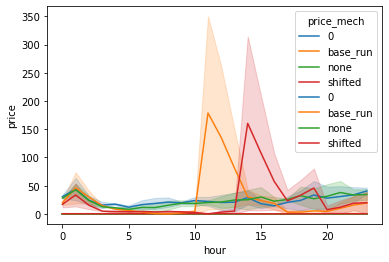

In [6]:
mdf_all_hours = mdf_all.groupby(['model_name','price_mech','hour','isbusinessday']).mean().reset_index()

import seaborn as sns

fig,ax = plt.subplots()

sns.lineplot(data=mdf_all_hours,x='hour',y='price',hue='price_mech',ax=ax)
sns.lineplot(data=mdf_all_hours,x='hour',y='charge_load',hue='price_mech',ax=ax)